In [2]:
import tensorflow 
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers,models

from PIL import Image


In [3]:
data_dir = r"C:\Users\Arun\Downloads\classification2"
x=[]
y=[]
classes = os.listdir(data_dir)
print(classes)

['dinosaur', 'lizard']


In [4]:
for i,j in enumerate(classes):
    inner_dir=os.path.join(data_dir,j)
    print(inner_dir)
    
    for img_name in os.listdir(inner_dir):
        class_path=os.path.join(inner_dir,img_name)
        try:
            img=Image.open(class_path).convert("RGB")
            img=img.resize((256,256))
            img=np.array(img)
            
            x.append(img)
            y.append(i)
        except Exception as e:
            print(f"the error in this {class_path} was {e}")


C:\Users\Arun\Downloads\classification2\dinosaur
C:\Users\Arun\Downloads\classification2\lizard


In [5]:
x=np.array(x)
y=np.array(y)
print(len(x))

2


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.001,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)



(1, 256, 256, 3) (1, 256, 256, 3) (1,) (1,)


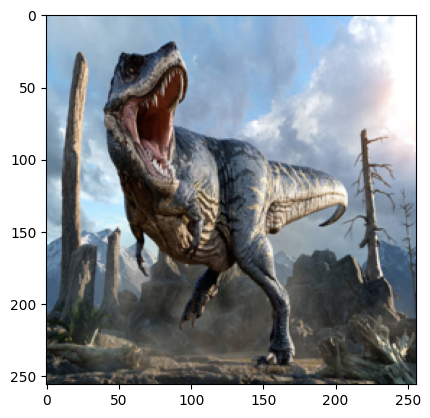

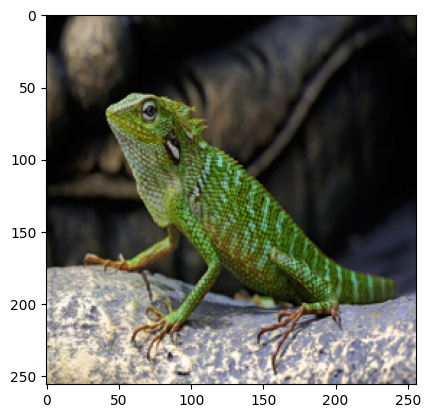

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_test[0])

CNN MODEL

In [8]:
cnn_model=models.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(10,activation="softmax")
])

C:\Users\Arun\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


DATA PREPROCESSING

In [9]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(-1,28,28,1).astype("float32")
x_test=x_test.reshape(-1,28,28,1).astype("float32")

print(len(y_train.shape))
print(len(np.unique(y_train)))
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


1
10


MODEL_COMPILATION

In [10]:
cnn_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [11]:
cnn_model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8664 - loss: 0.7344 - val_accuracy: 0.9645 - val_loss: 0.1208
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9722 - loss: 0.0900 - val_accuracy: 0.9795 - val_loss: 0.0738
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9800 - loss: 0.0655 - val_accuracy: 0.9807 - val_loss: 0.0606
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9841 - loss: 0.0531 - val_accuracy: 0.9830 - val_loss: 0.0588
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9866 - loss: 0.0445 - val_accuracy: 0.9782 - val_loss: 0.0781


In [13]:
new_img=r"C:\Users\Arun\Downloads\classification2\dinosaur\istockphoto-1390038554-612x612.jpg"
pred_img=Image.open(new_img).convert("L")
pred_img=pred_img.resize((28,28))
pred_img=np.array(pred_img)

pred_img=255-pred_img
pred_img=pred_img/255.0
pred_img=pred_img.reshape(1,28,28,1)
prediction=cnn_model.predict(pred_img)
prediction_label=np.argmax(prediction)
print(prediction_label)
print(prediction[0])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1
[0.1091404  0.12695234 0.09712756 0.09043086 0.09136598 0.09890441
 0.0971656  0.10308769 0.09935465 0.08647048]


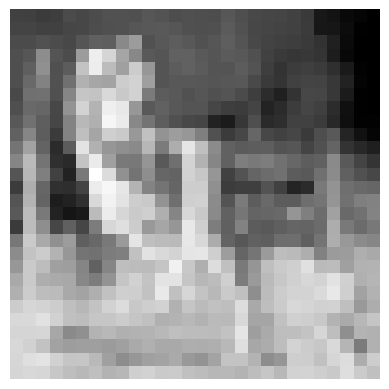

In [16]:
plt.imshow(pred_img.reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()